<a href="https://colab.research.google.com/github/cshah1995/Deep-Learning-MNIST-data/blob/main/MNIST_image_classification_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the important libraries and packages

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import torch as t
import torchvision as tv

from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torchvision.utils import make_grid

from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

#Loading the dataset

In [4]:
data = MNIST(root = 'data/', download = True, transform = ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



##Visualising the images

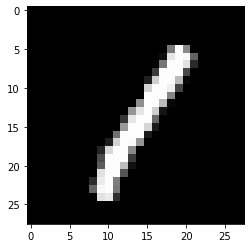

In [5]:
img, lbl = data[23]
plt.imshow(img[0], cmap = 'gray')

###Using the `permute` method

* The `permute` method allows to change the positions of the image shape.
* Eg: (1, 28, 28) can be changed to (28, 28, 1) using the permute method as shown below:

In [6]:
img.shape , img.permute(1,2,0).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28, 1]))

In [7]:
len(data)

60000

###Using dynamic parameters

In [8]:
DVAL_SIZE = 10000 #@param {type : 'slider', min : 2500, max: 20000, step : 2500}
DTR_SIZE = len(data) - DVAL_SIZE

#Splitting the dataset

In [9]:
dtr,dval = random_split(data, [DTR_SIZE, DVAL_SIZE])
len(dtr), len(dval)

(50000, 10000)

* Lets create batches of data using `Dataloader`


##Creating batches of data

In [10]:
BATCH_SIZE = 128 #@param {type: 'slider', min:64, max : 256, step: 64}


In [11]:
dtr_loader = DataLoader(dtr, batch_size = BATCH_SIZE, shuffle=True, num_workers= 2, pin_memory = True)
dval_loader = DataLoader(dval, batch_size = BATCH_SIZE*2, num_workers= 2, pin_memory = True)

* For visualisation we make use of `make_grid` function.
* We also use the `permute` method for visualising a bunch of images in form of grid.

In [12]:
for images, _ in dtr_loader:
  print(images.shape)
  break

torch.Size([128, 1, 28, 28])


##Using `make_grid` to generate batch of data

torch.Size([128, 1, 28, 28])


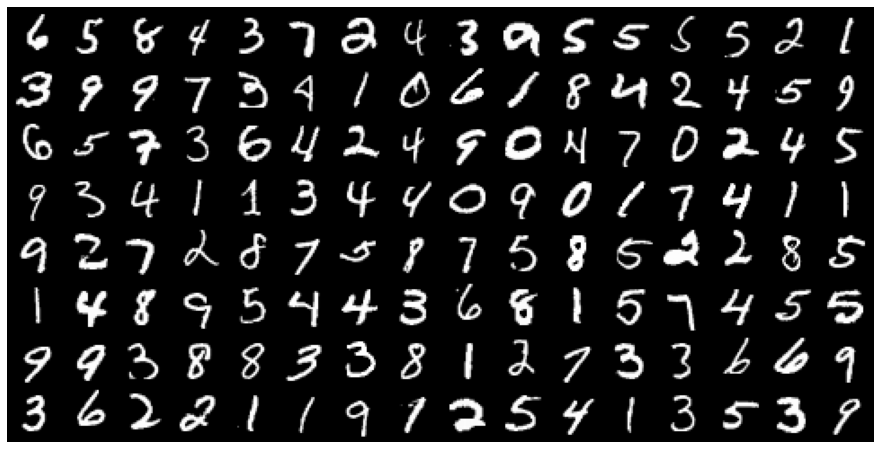

In [13]:
for img, _ in dtr_loader:
  print(img.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(img, nrow = 16).permute(1,2,0))
  break

In [14]:
t.cuda.is_available()

True

#Simple understanding of an Artificial NN
* Using hidden layer and introducing non-linearity

In [15]:
for im,lbl in dtr_loader:
  print(im.shape)
  input = im.reshape(-1, 784)
  print(input)
  print(input.shape)
  break

torch.Size([128, 1, 28, 28])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([128, 784])


In [16]:
IN_SIZE = input.shape[-1]
HL1_SIZE = 50
OP_SIZE = 10
print(IN_SIZE)

784


* Below is a simple implementation of 1 batch of training data
* We have used 1 hidden layer and introduced non-linearity by using `Relu activation` function

In [17]:
L1 = nn.Linear(IN_SIZE, HL1_SIZE)
L1_op = L1(input)
relu_op = F.relu(L1_op)
L2 = nn.Linear(HL1_SIZE, OP_SIZE)
L2_op = L2(relu_op)
loss = F.cross_entropy(L2_op, lbl)

input.shape[-1], relu_op.shape[-1], L2_op.shape[-1]


(784, 50, 10)

In [18]:
print("Let's see how the RELU unit has changed the values...")
print("\n")
print("Highest value from Layer_1 outputs is:", t.max(L1_op).item())
print("The RELU unit output for the same is:", t.max(relu_op).item())
print("\n")
print("We dont notice any change in the values")
print("\n")
print("Lowest value from Layer_1 outputs is:", t.min(L1_op).item())
print("The RELU unit output for the same is:", t.min(relu_op).item())
print("\n")
print("We can clearly see how the RELU unit converts any negative-numbers to 0")

Let's see how the RELU unit has changed the values...


Highest value from Layer_1 outputs is: 0.79566890001297
The RELU unit output for the same is: 0.79566890001297


We dont notice any change in the values


Lowest value from Layer_1 outputs is: -0.8883882164955139
The RELU unit output for the same is: 0.0


We can clearly see how the RELU unit converts any negative-numbers to 0


In [19]:
def accuracy(outputs, labels):
  _, preds = t.max(outputs, dim=1)
  return (t.tensor(t.sum(preds == labels).item()/ len(preds) * 100))

In [20]:
print(loss)

prob = F.softmax(L2_op, dim = 1)

max_prob, pred = t.max(prob, dim = 1)
print('pred label is:', pred[3])
print('actual label is:', lbl[3])

print(t.tensor(t.sum(pred == lbl).item()))

print('The initial accuracy is:' , accuracy(L2_op, lbl), '%')

tensor(2.3275, grad_fn=<NllLossBackward0>)
pred label is: tensor(8)
actual label is: tensor(7)
tensor(6)
The initial accuracy is: tensor(4.6875) %


#Data modelling

In [21]:
class MnistModel(nn.Module):
  def __init__(self, IN_SIZE, HL1_SIZE, OP_SIZE):
    super().__init__()
    self.linear1 = nn.Linear(IN_SIZE, HL1_SIZE)
    self.linear2 = nn.Linear(HL1_SIZE, OP_SIZE)
  
  def forward(self, xb):
    xb = xb.view(xb.size(0),-1)
    out = self.linear1(xb)
    out = F.relu(out)
    out = self.linear2(out)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return { 'val_loss': loss , 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = t.stack(batch_losses).mean()
    batch_acc = [x['val_acc'] for x in outputs]
    epoch_acc = t.stack(batch_acc).mean()
    return{'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

  
  def epoch_end(self, epoch, result):
    print('Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}'.format(epoch, result['val_loss'], result['val_acc']))

In [22]:
model = MnistModel(IN_SIZE= IN_SIZE, HL1_SIZE=HL1_SIZE, OP_SIZE=OP_SIZE)

In [23]:
for t in model.parameters():
  print(t.shape)

torch.Size([50, 784])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [24]:
for image, label in dtr_loader:
  output = model(image)
  break

loss = F.cross_entropy(output, label)
print(loss.item())
print(output.shape)

2.2940516471862793
torch.Size([128, 10])


##Understanding the importance of a GPU

* Before beginning the training process, let's check if a GPU is available.
* A GPU assists in a faster training process.
* We will define a helper function to ensure if the code uses GPU on availability or defaults to a CPU.

In [25]:

def get_device_type():

#we call cuda from the torch package and invoke the is_available method which confirms whether a GPU is avaiable
  if t.cuda.is_available():
    return t.device('cuda')
  else:
    return t.device('CPU')

In [28]:
dev = get_device_type()
dev

device(type='cuda')

* We define a function again to load the data batches generated from the dataloader to the device

In [30]:
def to_device(data, device):

  """" The below if condition is not really necessary, but can be handy if we want to move multiple tensor data at a time"""
  if isinstance(data, (list,tuple)):
    return [to_device(x, device) for x in data]
    """"below part of the code loads the data to the device"""    
  else:
    return data.to(device, non_blocking=True)


* We use the `to_device` function to load the batches of data to the device as shown below

In [31]:
for img, lbl in dtr_loader:
  print(img.shape)
  print(img.device)
  img = to_device(img, dev)
  print(img.device)
  break

torch.Size([128, 1, 28, 28])
cpu
cuda:0


##Moving the batches of data to device

* We create a wrapper function to move the batches of data to device 

In [32]:
class DeviceDataLoader():
  
  def __init__(self, dataloader, device):
    self.dataloader = dataloader
    self.device = device

  def __iter__(self):
    for batch in self.dataloader:
      yield to_device(batch, self.device)

  def __len__(self):
    return len(self.dataloader)



In [33]:
dtr_devloader = DeviceDataLoader(dtr_loader, device = dev)
dval_devloader = DeviceDataLoader(dval_loader, device = dev)

In [34]:
for xb, yb in dtr_devloader:
  print(xb.shape)
  print(yb.device)
  break

torch.Size([128, 1, 28, 28])
cuda:0


##Training and evaluating the data on the model

In [35]:
def evaluate(model, dval_loader):
  outputs = [model.validation_step(batch) for batch in dval_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, dtr_loader, dval_loader, opt_func = t.optim.SGD):

  optimizer = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    for batch in dtr_loader:

      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()


    result = evaluate(model, dval_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

* We moved the data to the GPU, but we also need to move the model to GPU

In [36]:
model = MnistModel(IN_SIZE= IN_SIZE, HL1_SIZE=HL1_SIZE, OP_SIZE=OP_SIZE)
to_device(model, dev)

MnistModel(
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=10, bias=True)
)

In [37]:
history = [evaluate(model, dval_devloader)]
history

[{'val_acc': 8.0859375, 'val_loss': 2.3145151138305664}]

In [38]:
history += fit(5, 0.5, model, dtr_devloader, dval_devloader)

Epoch [0], val_loss: 0.1934, val_acc: 94.2578
Epoch [1], val_loss: 0.1543, val_acc: 95.3223
Epoch [2], val_loss: 0.1123, val_acc: 96.5527
Epoch [3], val_loss: 0.1038, val_acc: 96.9043
Epoch [4], val_loss: 0.1037, val_acc: 96.9238


In [39]:
history += fit(5, 0.1, model, dtr_devloader, dval_devloader)

Epoch [0], val_loss: 0.0883, val_acc: 97.4512
Epoch [1], val_loss: 0.0872, val_acc: 97.4512
Epoch [2], val_loss: 0.0870, val_acc: 97.4707
Epoch [3], val_loss: 0.0854, val_acc: 97.4707
Epoch [4], val_loss: 0.0854, val_acc: 97.5000


In [40]:
history += fit(5, 0.1, model, dtr_devloader, dval_devloader)

Epoch [0], val_loss: 0.0849, val_acc: 97.5781
Epoch [1], val_loss: 0.0860, val_acc: 97.4316
Epoch [2], val_loss: 0.0849, val_acc: 97.4219
Epoch [3], val_loss: 0.0836, val_acc: 97.5977
Epoch [4], val_loss: 0.0837, val_acc: 97.5586


##Visualise the loss and accuracy over the evaluation dataset

Text(0, 0.5, 'loss')

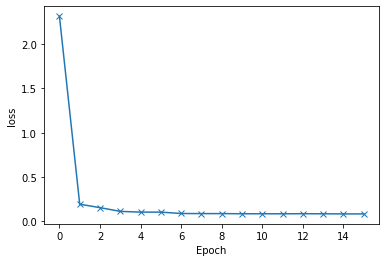

In [41]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('Epoch')
plt.ylabel('loss')


Text(0, 0.5, 'accuracy')

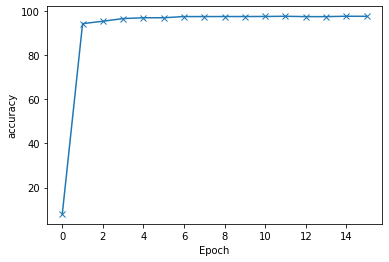

In [42]:
acc = [x['val_acc'] for x in history]
plt.plot(acc, '-x')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

#Testing the model

In [43]:
dtest = MNIST(root = 'data/', train=False, transform=ToTensor())

* We use the `.unsqueeze` method to feed each image of a training image as an individual batch

In [44]:
#Demonstration of unsqueeze method

img, lbl = dtest[0]
print(img.shape)
newimg = img.unsqueeze(0)
print(newimg.shape)


torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [45]:
def predict_image(image, model):
  xb = to_device(image.unsqueeze(0), dev)
  yb = model(xb)

  _, pred = t.max(yb, dim = 1)
  return pred.item()

Actual image is: 6 predicted image is: 6


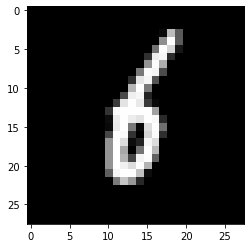

In [46]:
image, label = dtest[1250]
plt.imshow(image[0], cmap = 'gray');
print('Actual image is:' , label, 'predicted image is:' , predict_image(image, model))

Actual image is: 5 predicted image is: 5


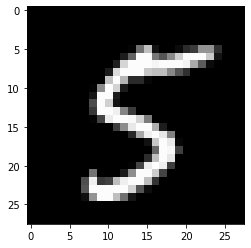

In [52]:
image, label = dtest[129]
plt.imshow(image[0], cmap = 'gray');
print('Actual image is:' , label, 'predicted image is:' , predict_image(image, model))

#Save the model

In [71]:
t.save(model.state_dict(), 'MNIST_DNN.pth')
new_model = MnistModel(784,50,10)
to_device(new_model, dev)
new_model.load_state_dict(t.load('MNIST_DNN.pth'))

<All keys matched successfully>

In [69]:
dtest_loader = DeviceDataLoader(DataLoader(dtest, batch_size = BATCH_SIZE*2, num_workers= 2, pin_memory = True),dev)

In [73]:
test_result = evaluate(new_model,dtest_loader)
#print(result)
print(test_result)

{'val_loss': 0.08465453237295151, 'val_acc': 97.421875}
